<a href="https://colab.research.google.com/github/gtsagkatakis/OptimizationMethods_2023/blob/main/HY530_PCA_SVD_example_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image Denoising with PCA
## Introduction
Imagine you're a scientist studying astronomical images of distant galaxies. These images are crucial for your research, but they often suffer from noise due to various factors like atmospheric interference and equipment limitations. To extract meaningful information from these noisy images, you need a way to reduce the noise while preserving the essential astronomical data. This is where PCA (Principal Component Analysis) come to the rescue!

## Prerequisites
Before we start, make sure you have the following libraries installed:
- NumPy
- Matplotlib
- Scikit-learn

## Step 1: Import Libraries
Let's begin by importing the necessary libraries and loading the dataset. It might take some time, be patient :)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.io import loadmat


(610, 340, 103)


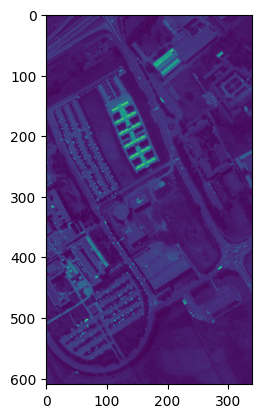

In [ ]:
X = loadmat('/content/drive/MyDrive/CSD573_2023/PaviaU.mat')['paviaU']

plt.imshow(X[:,:,10])
print(X.shape)

##Step 2: Explore the Dataset
Let's take a look at the dataset and some sample images from it.

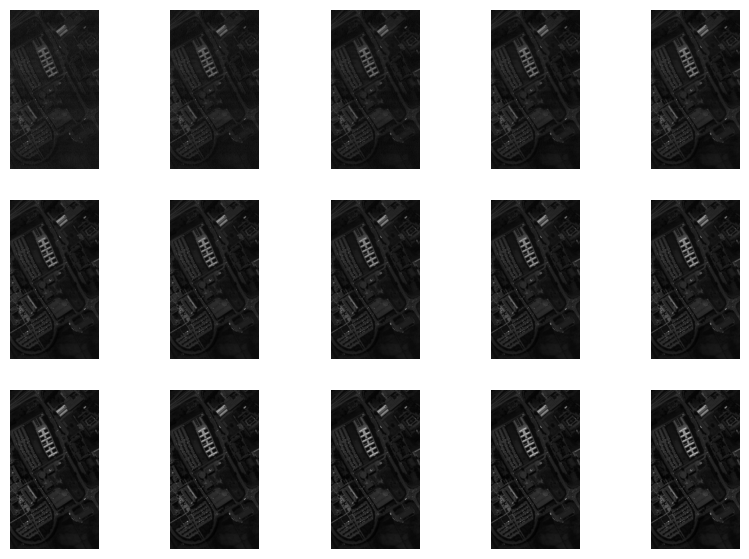

In [ ]:
# Display some sample images
fig, axes = plt.subplots(3, 5, figsize=(10, 7))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X[:,:,i], cmap='gray')
    ax.axis('off')

plt.show()

##Step 3: Data Preprocessing
Before applying PCA, let's select a single image from the dataset, standardize it and add some more noise.

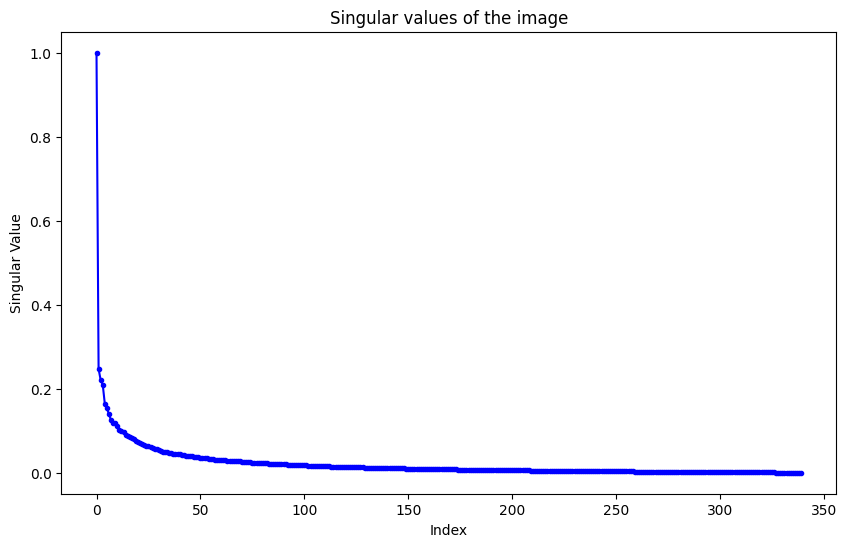

In [ ]:
_, S, _ = np.linalg.svd(X[:,:,10], full_matrices=False)
S=S/S.max()
plt.figure(figsize=(10, 6))
plt.plot(S, 'b.-')  # 'b.-' specifies blue color, dot marker, and solid line
plt.title('Singular values of the image')
plt.xlabel('Index')
plt.ylabel('Singular Value')
#plt.yscale('log')  # Using a logarithmic scale to better show the drop-off
plt.show()

In [ ]:
n1, n2, n3 = X.shape
X_2d = X.reshape(n1*n2, n3)

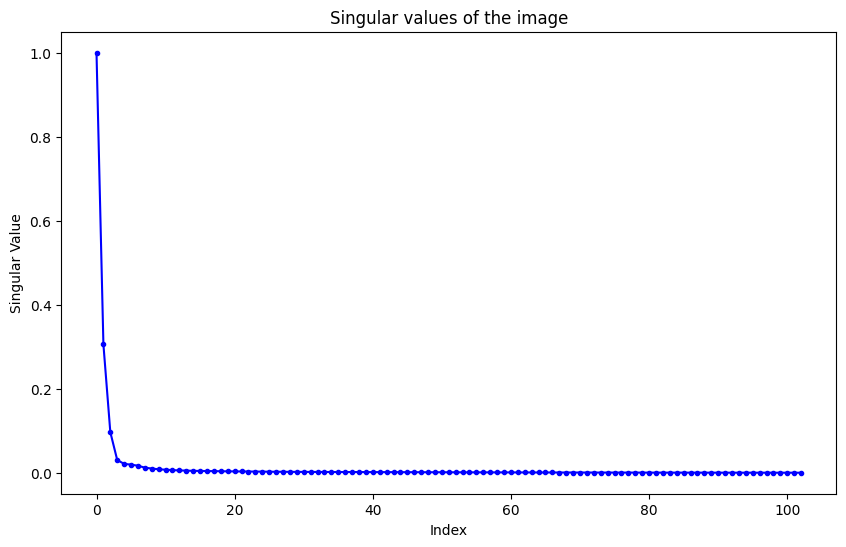

In [ ]:
_, S, _ = np.linalg.svd(X_2d, full_matrices=False)
S=S/S.max()
plt.figure(figsize=(10, 6))
plt.plot(S, 'b.-')  # 'b.-' specifies blue color, dot marker, and solid line
plt.title('Singular values of the image')
plt.xlabel('Index')
plt.ylabel('Singular Value')
#plt.yscale('log')  # Using a logarithmic scale to better show the drop-off
plt.show()

In [ ]:
# Standardize the data
X_2d_mean=np.mean(X_2d)
X_2d_std=np.std(X_2d)
X_2d = (X_2d - X_2d_mean) /X_2d_std

# Define the standard deviation of the Gaussian noise
noise_stddev = 0.5  # You can adjust this value

# Generate Gaussian noise with the same shape as the image
noise = np.random.normal(0, noise_stddev, X_2d.shape)

# Add the noise to the image
Y_2d = X_2d + noise

Y=Y_2d.reshape(n1, n2, n3)

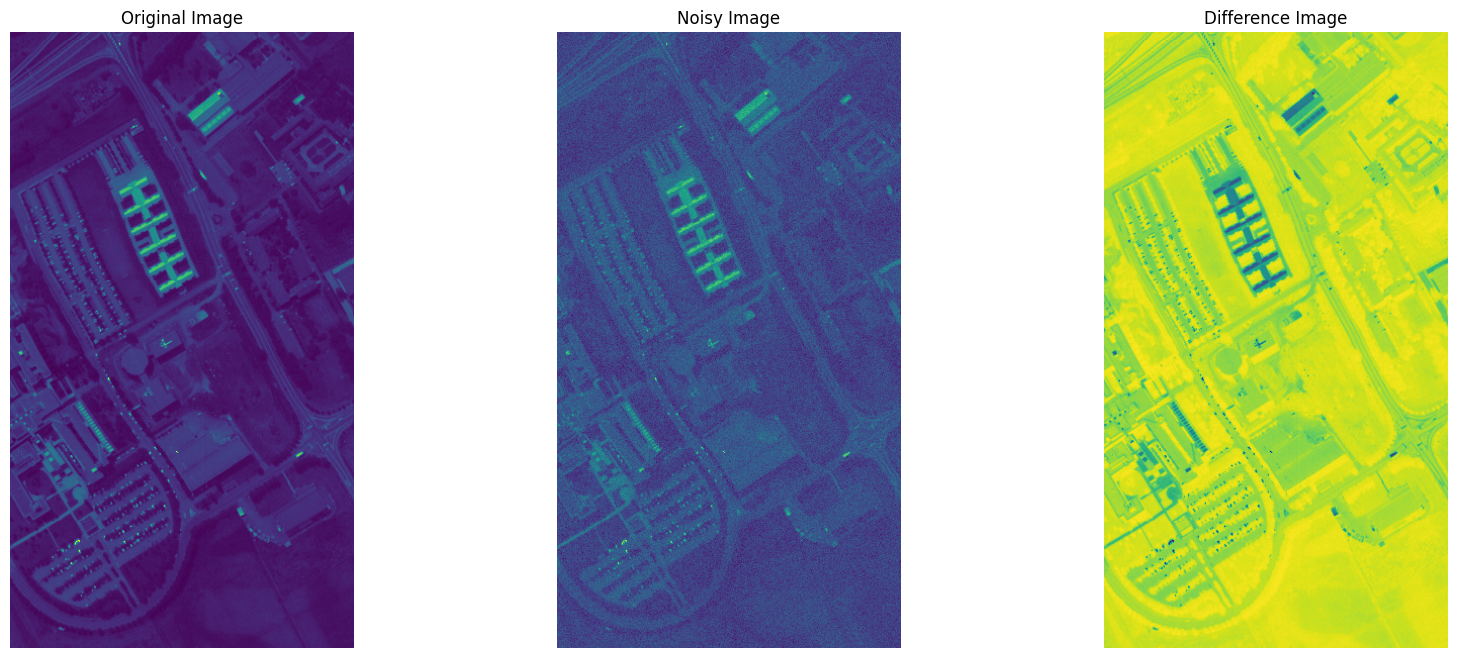

In [ ]:
# Display the noisy and original images
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
axes[0].imshow(X[:,:,10], cmap='viridis')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(Y[:,:,10], cmap='viridis')
axes[1].set_title('Noisy Image')
axes[1].axis('off')

axes[2].imshow(Y[:,:,10]-X[:,:,10], cmap='viridis')
axes[2].set_title('Difference Image')
axes[2].axis('off')

plt.show()

##Step 4: Define the PCA function
PCA is primarily used as a technique for dimensionality reduction. It identifies a set of orthogonal principal components (eigenvectors of the covariance matrix) that capture the most significant variations in the data. These principal components can be used to represent the data in a lower-dimensional space.

In [ ]:
import numpy as np

def custom_pca(data, num_components=None):
    """
    Perform Principal Component Analysis (PCA) on the given data.

    Parameters:
    - data: The input data matrix with samples in rows and features in columns.
    - num_components: The number of principal components to retain. If None, all components are retained.

    Returns:
    - components: The principal components.
    - explained_variance: The explained variance of each principal component.
    - mean: The mean of the input data.
    """
    # Calculate the mean of the data
    mean = np.mean(data, axis=0)

    # Center the data by subtracting the mean
    centered_data = data - mean

    # Calculate the covariance matrix
    covariance_matrix = np.cov(centered_data, rowvar=False)

    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Sort the eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Retain only the specified number of principal components
    if num_components is not None:
        components = eigenvectors[:, :num_components]
        explained_variance = eigenvalues[:num_components] / np.sum(eigenvalues)
    else:
        components = eigenvectors
        explained_variance = eigenvalues / np.sum(eigenvalues)

    return components, explained_variance, mean


## Step 5: Applying PCA
Now, we'll perform PCA to denoise the image. Let's choose a reasonable number of components and fit the PCA model.

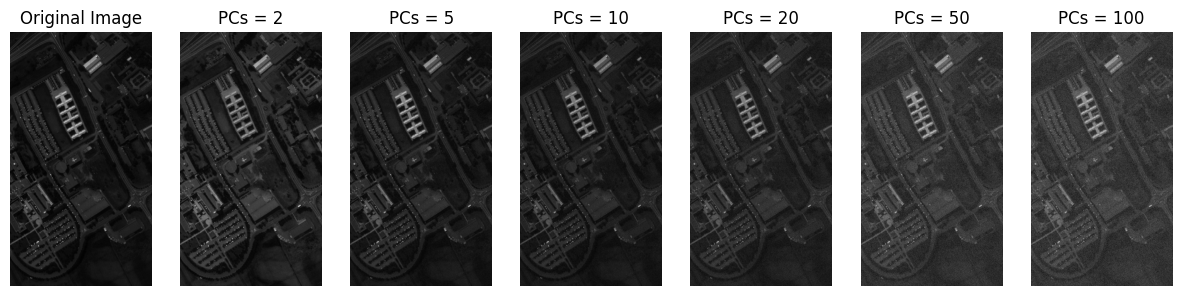

In [ ]:
# Define a list of different numbers of principal components to test
num_components_list = [2, 5, 10, 20, 50, 100]

# Create subplots for comparing denoised images
fig, axes = plt.subplots(1, len(num_components_list) + 1, figsize=(15, 5))
axes[0].imshow(X[:,:,10] , cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Denoise the input image for each number of principal components
for i, num_components in enumerate(num_components_list):
    # Perform PCA with the specified number of components
    components, explained_variance, mean = custom_pca(Y_2d, num_components)

    # Reconstruct the denoised image
    a=np.dot(Y_2d,components )
    denoised_image_2D = np.dot(a,components.T) + mean

    # Display the denoised image
    denoised_image=denoised_image_2D.reshape(n1,n2, n3)
    axes[i + 1].imshow(denoised_image[:,:,10], cmap='gray')
    axes[i + 1].set_title(f'PCs = {num_components}')
    axes[i + 1].axis('off')

plt.show()

##Step 5: Visualizing Explained Variance
In PCA, you can visualize the explained variance as a function of the number of principal components. By increasing the number of components, you can control how much of the original variance in the data is retained. This allows you to balance dimensionality reduction with information preservation.

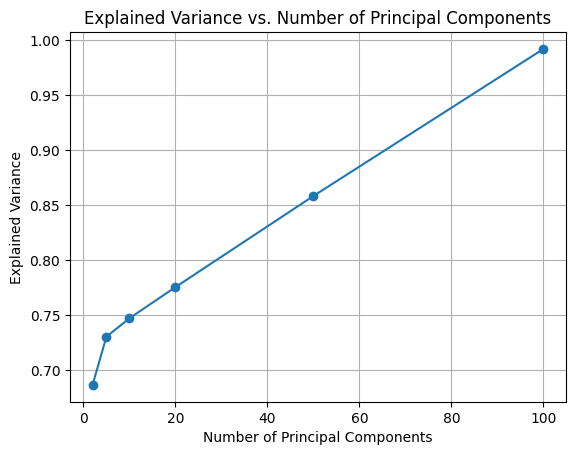

In [ ]:
explained_variance = []  # Store explained variance for each number of components
for num_components in num_components_list:
    _, variances, _ = custom_pca(Y_2d, num_components)
    explained_variance.append(np.sum(variances))

plt.plot(num_components_list, explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.grid()
plt.show()

## Image denoising with SVD
 SVD is a more general matrix factorization technique that can be applied to a wide range of problems, including dimensionality reduction, image compression, and recommendation systems. It decomposes a matrix into three components: U, Σ (singular values), and $V^T$. SVD is known for its numerical stability, making it a robust technique for various applications. It can handle matrices of different shapes and is less sensitive to scaling and centering of data.

##Step 1: Define the SVD function

In [ ]:
def custom_svd(matrix):
    """
    Perform Singular Value Decomposition (SVD) on the given matrix.

    Parameters:
    - matrix: The input matrix to decompose.

    Returns:
    - U: The left singular vectors.
    - S: The singular values.
    - Vt: The transpose of the right singular vectors.
    """
    # Calculate the covariance matrix
    covariance_matrix = np.dot(matrix.T, matrix)

    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Sort the eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Calculate the singular values and U matrix
    singular_values = np.sqrt(eigenvalues)
    U = eigenvectors

    # Calculate the Vt matrix
    Vt = np.dot(np.linalg.inv(np.diag(singular_values)), np.dot(U.T, matrix.T))

    return U, singular_values, Vt

##Step2: Apply SVD
Now, let's perform SVD on the noisy image.

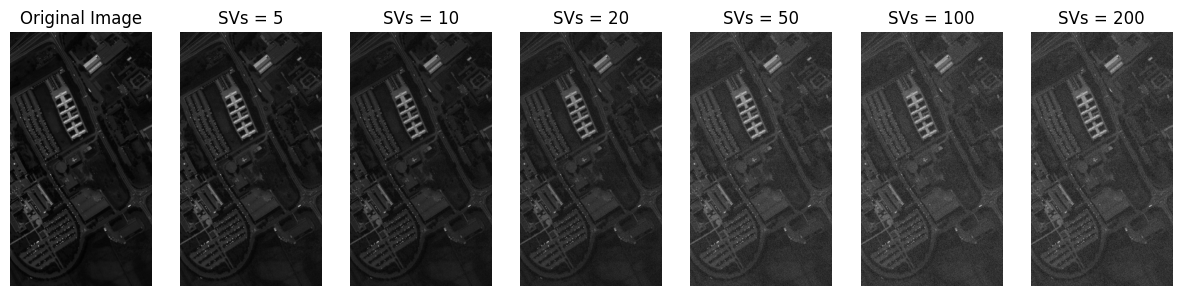

In [ ]:
# Define a list of different numbers of singular values to test
num_singular_values_list = [5, 10, 20, 50, 100, 200]

# Create subplots for comparing denoised images using SVD
fig, axes = plt.subplots(1, len(num_singular_values_list) + 1, figsize=(15, 5))
axes[0].imshow(X[:,:,10], cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Denoise the input image for each number of singular values/components
for i, num_singular_values in enumerate(num_singular_values_list):
    # Perform SVD with the specified number of singular values
    U, singular_values, Vt = custom_svd(Y_2d)

    # Truncate the singular values and matrices to retain the specified number of singular values/components
    U_truncated = U[:, :num_singular_values]
    singular_values_truncated = singular_values[:num_singular_values]
    Vt_truncated = Vt[:num_singular_values, :]

    # Reconstruct the denoised image
    denoised_image_svd = np.dot(U_truncated, np.dot(np.diag(singular_values_truncated), Vt_truncated))
    denoised_image_svd=denoised_image_svd.T
    denoised_image_svd=denoised_image_svd.reshape(n1,n2,n3)

    # Display the denoised image using SVD
    axes[i + 1].imshow(denoised_image_svd[:,:,10], cmap='gray', origin='upper')
    axes[i + 1].set_title(f'SVs = {num_singular_values}')
    axes[i + 1].axis('off')

plt.show()

##Step 3: Visualizing Explained Variance
SVD doesn't directly provide explained variance ratios like PCA. The explained variance can be measured in terms of the sum of squares of the retained singular values. This provides a way to quantify how much of the total variance is captured by a certain number of singular values. Let's visualize it.

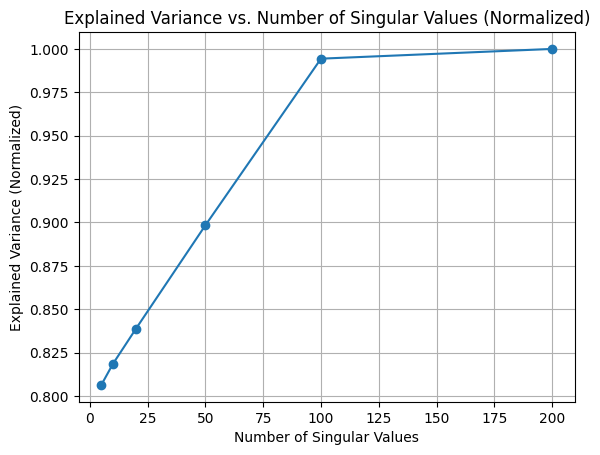

In [ ]:
explained_variance_svd = []  # Store explained variance for each number of singular values/components
for num_singular_values in num_singular_values_list:
    # Perform SVD with the specified number of singular values
    U, singular_values, Vt = custom_svd(Y_2d)

    # Calculate the explained variance as the sum of squares of the retained singular values
    explained_variance_svd.append(np.sum(singular_values[:num_singular_values]**2))

total_variance = np.sum(np.square(singular_values))
explained_variance_normalized = explained_variance_svd / total_variance

plt.plot(num_singular_values_list, explained_variance_normalized, marker='o')
plt.xlabel('Number of Singular Values')
plt.ylabel('Explained Variance (Normalized)')
plt.title('Explained Variance vs. Number of Singular Values (Normalized)')
plt.grid()
plt.show()


## Comparison between PCA and SVD


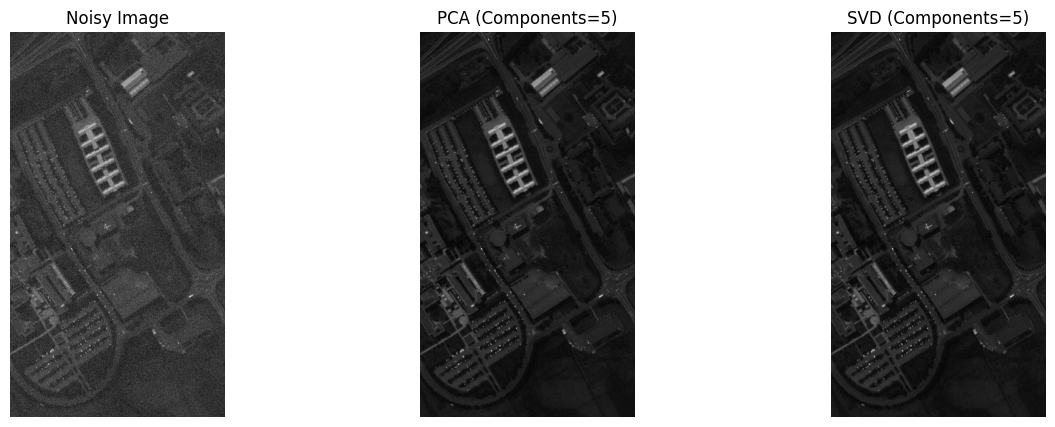

In [ ]:
# Choose a number of components for comparison
n_components_comparison = 5  # You can adjust this value

# Perform PCA with the selected number of components on the noisy image
pca = PCA(n_components=n_components_comparison)
image_data_compressed_pca = pca.fit_transform(Y_2d)
image_data_reconstructed_pca_2d = pca.inverse_transform(image_data_compressed_pca)
image_data_reconstructed_pca = image_data_reconstructed_pca_2d.reshape(n1,n2,n3)

# Perform SVD with the selected number of components on the noisy image
U, sigma, VT = custom_svd(Y_2d)
reconstructed_img_svd_2d = np.dot(U[:, :n_components_comparison], np.dot(np.diag(sigma[:n_components_comparison]), VT[:n_components_comparison, :]))
reconstructed_img_svd_2d=reconstructed_img_svd_2d.T
reconstructed_img_svd = reconstructed_img_svd_2d.reshape(n1,n2,n3)

# Create subplots for PCA, SVD, and the noisy image comparisons
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(Y[:,:,10], cmap='gray')
axes[0].set_title('Noisy Image')
axes[0].axis('off')
axes[1].imshow(image_data_reconstructed_pca[:,:,10], cmap='gray')
axes[1].set_title(f'PCA (Components={n_components_comparison})')
axes[1].axis('off')
axes[2].imshow(reconstructed_img_svd[:,:,10], cmap='gray')
axes[2].set_title(f'SVD (Components={n_components_comparison})')
axes[2].axis('off')
plt.show()

 Peak Signal-to-Noise Ratio (PSNR) to quantitatively measure and compare the quality of denoised images obtained through PCA and SVD. PSNR is a common metric used to assess the fidelity of an image compared to a reference (original) image. A ***higher PSNR*** value indicates ***better image quality***.

In [ ]:
from skimage import metrics

mse_pca = metrics.mean_squared_error(X_2d, image_data_reconstructed_pca_2d)
mse_svd = metrics.mean_squared_error(X_2d, reconstructed_img_svd_2d)
print('mse_pca',mse_pca,'mse_svd',mse_svd)

# # Create a bar plot to compare PSNR values
# plt.bar(['PCA', 'SVD'], [psnr_pca, psnr_svd], color=['blue', 'green'])
# plt.xlabel('Denoising Method')
# plt.ylabel('NMSE')
# plt.title(f'NMSE Comparison (Components={n_components_comparison})')
# plt.ylim(0, max(nmse_pca, nmse_svd) + 5)  # Set y-axis limits
# plt.show()

mse_pca 0.016272359410198157 mse_svd 0.01627052226476455
